### Import bibliotek

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from operator import itemgetter
from networkx.algorithms.community.centrality import girvan_newman

### Import danych

In [ ]:
#Zainportuj dane "eurovision_2019.xlsx".


### Wizualizacja grafu

In [ ]:
#Utwórz graf z danych za pomocą funkcji "nx.from_pandas_edgelist", uwzględnij dodatkowy argument ['weight'] oraz create_using=nx.OrderedDiGraph


In [ ]:
#Zwizualizuj graf za pomocą funkcji "nx.draw", dodaj argument node_color==list(nx.pagerank(G).values())  pozwoli to na uwzględnienie miary pagerank - miary wskazującej na ważność aktora na podstawie relacji skierowanych w jego stronę od innych aktorów. 


### Podstawowe informacje

In [ ]:
#Sprawdź podstawowe informacje o grafie poprzez formuły nx.info(G), G.nodes(), G.edges()


In [ ]:
#Sprawdź gęstość grafu za pomocą funkcji nx.density() 


In [ ]:
#Sprawdź przechodniość w grafie za pomocę funkcji nx.transitivity()


In [ ]:
#Wskaż najkrótszą ścieżkę między Polską, a Albanią poprzez funkcję nx.shortest_path()


### Ważność aktora w sieci

In [ ]:
#Sprawdzenie ważności aktorów w sieci za pomocą stopnia wierzchołka
G.degree()
sorted(nx.degree_centrality(G).items(), key=itemgetter(1), reverse=True)

In [ ]:
#Centralność bliskości - wartość 1 oznacza, że węzeł znajduje się w najbliższej odległości do wszystkich węzłów, 0 - oznacza, że jest w dalekiej pozycji od wzystkich węzłów w sieci.
#Im wartość bliższa jedności tym węzeł ma mozliwość wymiany informacji w krótszym czasie i polegając na mniejszej liczbie pośredników
#Sprawdź centralność bliskości za pomocą funkcji nx.closeness_centrality(graf)


In [ ]:
#Centralność pośredniczenia - wartość 1 oznacza, że węzeł znajduje się na wszystkich najkrótszych ścieżkach, wartoć 0 - węzeł nigdy nie występuje na najkrótszyh ścieżkach
#Sprawdź centralność pośredniczenia za pomocą funkcji nx.betweenness_centrality(graf)


### Sieć ego dla Polski

In [ ]:
#Wczytanie i pogrupowanie danych z wszystkich lat
data = pd.read_excel("eurovision_all.xlsx", index_col=0)
data = data.groupby(['countryfrom','countryto']).agg({'points':'sum'})\
    .reset_index().rename(columns={'points':'weight'})

In [ ]:
#Wyodrębnj dane dla Polski (countryfrom ="Poland" oraz countryto=='Poland').

#Ogranicz dane do krajów między którymi przez badany okres wpłynęło conajmniej 30 punktów

#Swórz graf dla wyodrębnionych danych


In [ ]:
#Stwórz sieć Ego za pomocą formuły nx.ego_graph(g,"Poland"), a następnie zwizualizuj ją za pomocą funkcji nx.draw()


### Wykrywanie wspólnot

In [ ]:
#Wspólnoty wyodręniane za pomocą metody Girvana-Newmana #https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html
g = nx.from_pandas_edgelist(data,'countryfrom','countryto',['weight'])
communities = girvan_newman(g)

node_groups = []
for com in next(communities):
    node_groups.append(list(com))
node_groups = []
for com in next(communities):
    node_groups.append(list(com))

print(node_groups)

color_map = []
for node in g:
    if node in node_groups[0]:
        color_map.append('skyblue')
    elif node in node_groups[1]:
        color_map.append('coral')
    else: 
        color_map.append('olive') 
plt.figure(figsize=(10,10))
nx.draw_spring(g, node_color=color_map, with_labels=True, edge_color='gray')
plt.show()

### Wyrywanie wspólnot na przykładzie Gry o tron

In [10]:
#Wgranie danych "book1.csv" dotyczących relacji postaci z gry o tron  
got = pd.read_csv("book1.csv")
got=(got[got.weight>20])
G = nx.from_pandas_edgelist(got, source='Source', target ='Target', edge_attr=True)

In [11]:
#Wyodrębnienie komponentów z sieci poprzez funkcję nx.connected_components (Komponent - sieć, która w obrębie grupy nie zawiera węzłów bez połączeń.)
#Znalezienie największego komponentu poprzez funkcję max(komponent, key = len)

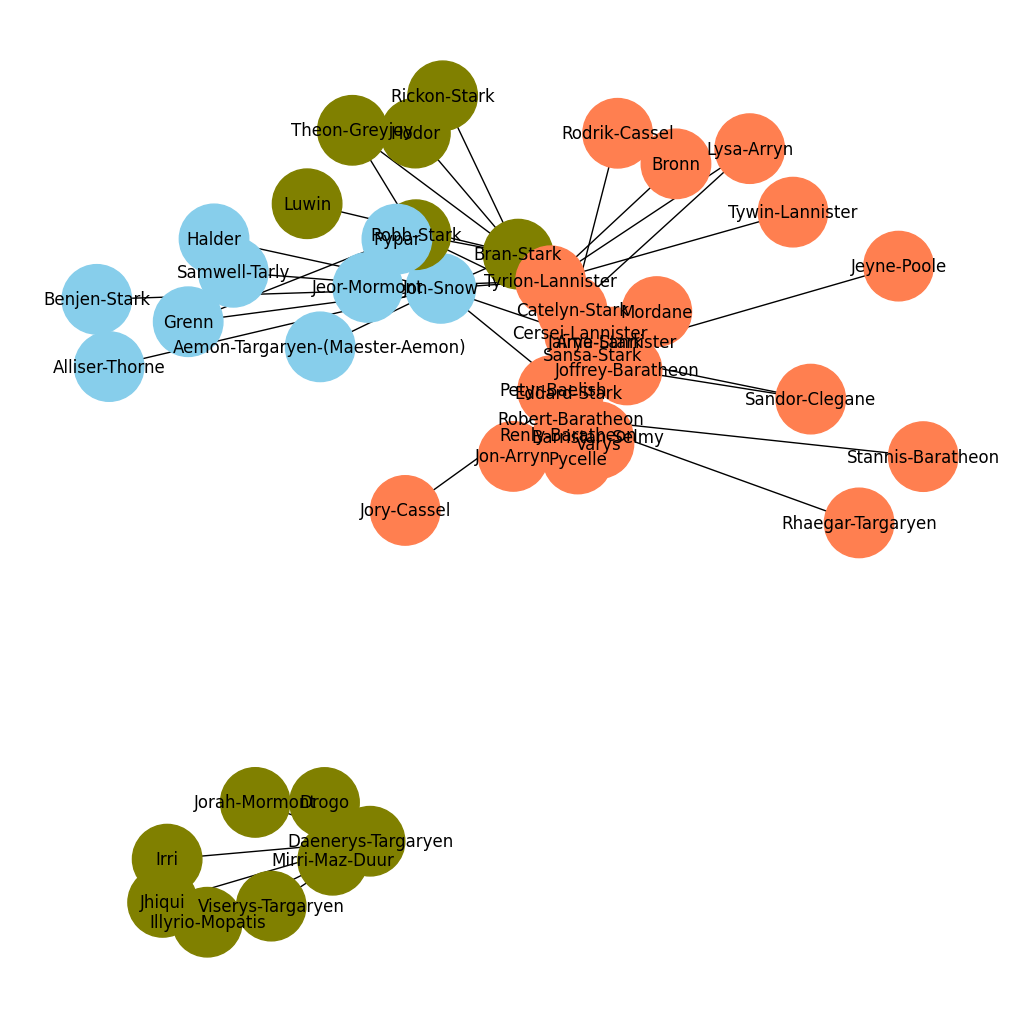

In [12]:
#Stworzenie grafu z największym komponentem sprawdzenie jego gęstości za pomocą funkcji nx.density().
components = nx.connected_components(G)

largest_component = max(components, key=len)
nodes_to_remove = []
for x in G.nodes:
    if x not in largest_component:
        nodes_to_remove.append(x)
G.remove_nodes_from(nodes_to_remove)
communities = girvan_newman(G)

node_groups = []
for com in next(communities):
    node_groups.append(list(com))
node_groups = []
for com in next(communities):
    node_groups.append(list(com))

color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('skyblue')
    elif node in node_groups[1]:
        color_map.append('coral')
    else:
        color_map.append('olive')
plt.figure(figsize=(10,10))
d = dict(G.degree)
# pos = nx.shell_layout(G)
pos = nx.spring_layout(G, threshold=0.01, scale=0.5)

nx.draw(G, pos, nodelist=d.keys(), node_size=2500, with_labels=True, node_color=color_map)
plt.show()

density = nx.density(G)

In [13]:
#Za pomocą formuły girvan_newman(G) znajdź wspolnoty występujące w grafie i zwizualizuj je na grafie.
